<a href="https://colab.research.google.com/github/wf-yamaday/machine-learning/blob/master/%E3%82%BC%E3%83%AD%E3%81%8B%E3%82%89%E4%BD%9C%E3%82%8BDeepLearning/%E3%82%BC%E3%83%AD%E3%81%8B%E3%82%89%E5%AD%A6%E3%81%B6DeepLearning%20%232.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ニューラルネットワーク

パーセトンでは，重みを設定するという作業を人の手によって行わなければならないという弱点がありました．（重みを決める作業）

ニューラルネットは，適切な重みパラメータをデータから自動で学習できます．

### パーセプトンの復習
x<sub>1</sub>とx<sub>2</sub>の２つの入力信号を受け取り，yを出力するパーセプトンは次の式で表されました．

$$
y = \left\{
\begin{array}
& 0 & (b+w_1x_1+w_2x_2 \leqq 0) \\
1 & (b+w_1x_1+w_2x_2 > 0)
\end{array}
\tag{1.1}
\right.
$$

ここではbは「バイアス」と呼ばれるパラメータで，これはニューロの発火のしやすさをコントロールします．
一方w<sub>1</sub>,w<sub>2</sub>は各信号の「重み」を表すパラメータで各信号の重要性をコントロールします．

### 活性化関数の登場
先ほどの式では，入力信号の総和とそれに対応する出力を表していました．
ここでは，h()という関数を考え，入力信号の総和を計算してみたいと思います．先ほどの式は以下のようになります．

$$
h(a) = b+w_1x_1+w_2x_2 \tag{1.2}
$$

$$
y = h(a) \tag{1.3}
$$

式(1.2)では重み付き入力信号とバイアスの総和を計算し，それをaとします．そして，式(1.3)でaがh()で変換されyが出力される．という流れになります．
このh()という，入力信号の総和を出力信号に変換する関数を<b>活性化関数,</b>(activation function)と呼びます．

式(1.1)で表される活性化関数は，閾値を境にして出力が切り替わる関数で，「ステップ関数」，「階段関数」と呼ばれます．
そのため「パーセプトンでは，ステップ関数を利用している」と言うことができます．つまり多数の候補がある中でパーセプトンはステップ関数を利用しているのです．
実は，この活性化関数をステップ関数から別の関数に切り替えることでニューラルネットワークの世界に進むことができるのです．


### シグモイド関数

$$
h(x) = \frac{1}{1+\exp(-x)}　\tag{1.4}
$$

式(1.4)で表されるシグモイド関数は一見複雑そうですが，xに何か入力すれば何らかの出力が返される単なる「関数」です．

ニューラルネットワークではシグモイド関数を用いて信号の変換を行い，その変換された信号が次のニューロンに与えられます．
それでは，活性化関数として利用されるシグモイド関数についてステップ関数と比較しながら見ていくことにしましょう．


## ステップ関数の実装

ステップ関数は，入力が0を超えたら，１を出力し，それ以外は０を出力する関数でした．
最も簡単に実装すると以下のようになるのではないでしょうか．

In [0]:
def step_function(x):
    if x > 0:
        return 1
    else:
        return 0

In [0]:
print(step_function(1))
print(step_function(0))

1
0


この実装法は簡単ですが，これでは引数に実数xしか与えることができません．
もっと柔軟に対応するために引数にNumPy配列を取ることができるように改良して行きたいと思います．

In [0]:
import numpy as np
def step_function(x):
    y = x > 0
    return y.astype(np.int)

In [0]:
x=np.array([-1.0,3.0,2.0])
step_function(x)

array([0, 1, 1])

### ステップ関数のグラフ

ステップ関数をグラフで表して見ましょう．グラフを描画するには，matplotlibを使用します．

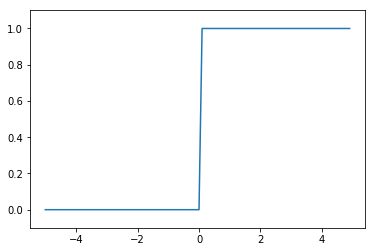

In [0]:
import matplotlib.pylab as plt
x = np.arange(-5.0,5.0,0.1)
y = step_function(x)
plt.plot(x,y)
plt.ylim(-0.1,1.1)
plt.show()

## シグモイド関数の実装

式(1.4)で表されるシグモイド関数は，Pythonでは簡単に実装することができます．

In [0]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x)) 

### シグモイド関数のグラフ

シグモイド関数のグラフを見てみましょう．

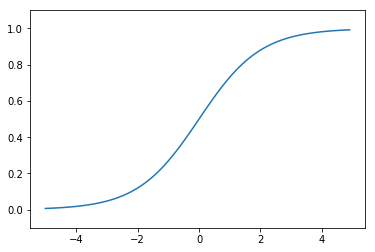

In [0]:
x = np.arange(-5.0,5.0,0.1)
y = sigmoid(x)
plt.plot(x,y)
plt.ylim(-0.1,1.1)
plt.show()

### シグモイド関数とステップ関数の比較

まず明らかにシグモイド関数の方が”滑らか”なグラフになります．
これが意味するのは，入力に対して連続的に出力が変化するということです．
ステップ関数が０か１のどちらかの値を返さないのに対し，シグモイド関数は実数を返します．つまり，パーセプトンでは，ニューロン間を0か１の信号が流れていたのに対し，ニューラルネットワークでは連続的な実数値の信号が流れます．

どんなに信号の値が大きくても，出力信号の値を０から１の間に押し込めるのも両者の共通点です．

### 非線形関数
ステップ関数とシグモイド関数の重要な共通点は<b>非線形関数</b>であることです．
シグモイド関数は曲線，ステップ関数は階段のような折れ曲がった直線で表されどちらも非線形な関数に分類されます．
ニューラルネットワークでは，活性化関数に非線形関数を用いる必要があります．言い換えると<b>活性化関数には線形関数を用いてはならない</b>ということになります．
線形関数の問題点はどんなに層を深くしても，それと同じことを行う「隠れ層のないネットワーク」が存在する，ということに起因します．
例えば線形関数h(x) = cx を活性化関数として，y(x) = h(h(h(x)))を行う計算を３層のネットワークに対応させて考えることにします．
この計算はy(x) = c*c*c*xのかけ算を行いますが，同じことはy(x) = a(x) a=c<sup>3</sup>の1回のかけ算でつまり隠れ層のないネットワークで表現できるのです．
このように線形関数を用いた場合，多層にすることの利点を活かすことができません．
そのため層を重ねることの恩恵を受けるためには，活性化関数に非線形関数を用いる必要があるのです．

### ReLU関数

シグモイド関数はニューラルネットワークの歴史において，古くから利用されてきました．しかし最近では，<b>ReLU関数</b>(Rectified Liner Unit)という関数が主に用いられます．ReLU関数は入力が０を超えてればその入力をそのまま出力し，0以下なら０を出力する関数です．
$$
h(x) = \left\{
\begin{array} 
&x &( x > 0)\\
0 &( x \leqq 0)
\end{array}
\tag{1,5}
\right.
$$
数式で表すと(1.5)のようになります．
この関数をPythonで実装すると以下のようになります．

In [0]:
def relu(x):
    return np.maximum(0,x)

In [0]:
print(relu(6))

6


## 多次元配列の計算




In [1]:
import numpy as np
A = np.array([1,2,3,4])
print(A)

[1 2 3 4]
